# Face Recognition Program

In [1]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img = cv2.imread('many-faces-family.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Template Matching Program

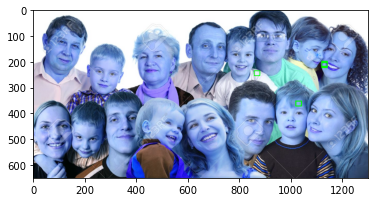

In [13]:
# https://pythonprogramming.net/template-matching-python-opencv-tutorial/

import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('opencv-template-matching-python-tutorial.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('opencv-template-for-matching.jpg',0)
w, h = template.shape

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.70

loc = np.where( res >= threshold)

for (x,y) in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, (x,y), (x+ w, y + h), (0,255,0), 2)


plt.imshow(img_rgb)
plt.show()

In [1]:

import nltk
#nltk.download('punkt')

In [2]:
mytext = """Hello Ms. Nikita, how are you? I hope everything is going well. 
Have a good day, see you soon."""


In [3]:
# tokenize sentence

from nltk.tokenize import sent_tokenize
print(sent_tokenize(mytext))

['Hello Ms. Nikita, how are you?', 'I hope everything is going well.', 'Have a good day, see you soon.']


In [4]:
# tokenize words

from nltk.tokenize import word_tokenize 
print(word_tokenize(mytext))


['Hello', 'Ms.', 'Nikita', ',', 'how', 'are', 'you', '?', 'I', 'hope', 'everything', 'is', 'going', 'well', '.', 'Have', 'a', 'good', 'day', ',', 'see', 'you', 'soon', '.']


In [6]:
 
mytext = "Python is interesting. Python is easy and interesting. \
Python is not very difficult."
 
tokens=word_tokenize(mytext)
#print(tokens)


freq = nltk.FreqDist(tokens)
#print(freq)

for key,val in freq.items():
 
    print (str(key) + ':' + str(val))


Python:3
is:3
interesting:2
.:3
easy:1
and:1
not:1
very:1
difficult:1


In [8]:

from nltk.corpus import stopwords
 
clean_tokens = tokens # copy of the list
 
sr = stopwords.words('english')
#print(sr) 

for token in clean_tokens:
 
    if token in stopwords.words('english'):
 
        clean_tokens.remove(token)


newfreq = nltk.FreqDist(clean_tokens)
 
for key,val in newfreq.items():
 
    print (str(key) + ':' + str(val))




Python:3
interesting:2
.:3
easy:1
not:1
difficult:1


In [13]:
from nltk.corpus import stopwords

mytext = "Python is interesting. Python is easy and interesting. \
Python is not very difficult."
 
tokens=word_tokenize(mytext)
#print(tokens)

clean_tokens = tokens.copy()  # copy of the list
 
sr = stopwords.words('english')
sr.append(".")
#sr.extend([".",",","ain't",":"])
sr.remove("very")
sr.remove("not")
print(sr) 


for token in clean_tokens:
 
    if token in sr:
 
        clean_tokens.remove(token)


newfreq = nltk.FreqDist(clean_tokens)
 
for key,val in newfreq.items():
 
    print (str(key) + ':' + str(val))
    

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 

In [17]:
from nltk.tokenize import RegexpTokenizer
mytext = """Hello Ms. Nikita, how are you? I hope everything is going well. 
Have a good day, see you soon."""

tokenizer = RegexpTokenizer(r'\w+')
clean_tokens= tokenizer.tokenize(mytext)
print(clean_tokens)


['Hello', 'Ms', 'Nikita', 'how', 'are', 'you', 'I', 'hope', 'everything', 'is', 'going', 'well', 'Have', 'a', 'good', 'day', 'see', 'you', 'soon']


In [18]:
import nltk
from bs4 import BeautifulSoup
 
import urllib.request
 
response = urllib.request.urlopen('https://wiki.python.org/moin/BeginnersGuide')
 
html = response.read()

#print(html)
#extract data in a clearer way
soup = BeautifulSoup(html,features="xml")
 
text = soup.get_text(strip=True)
 
print(text)


BeginnersGuide - Python WikiSearch:BeginnersGuideBeginnersGuideFrontPageRecentChangesFindPageHelpContentsBeginnersGuidePageImmutable PageCommentsInfoAttachmentsMore Actions:Raw TextPrint ViewDelete Cacheclass="disabled">------------------------Check SpellingLike PagesLocal Site Mapclass="disabled">------------------------class="disabled">Rename Pageclass="disabled">Delete Pageclass="disabled">------------------------class="disabled">------------------------class="disabled">Remove Spamclass="disabled">Revert to this revisionclass="disabled">------------------------SlideShowUserLoginBeginner's Guide to PythonNew to programming? Python is free and easy to learn if you know where to start! This guide will help you to get started quickly.Chinese TranslationNew to Python?ReadBeginnersGuide/Overviewfor a short explanation of what Python is.Getting PythonNext, install the Python 3 interpreter on your computer. This is the program that reads Python programs and carries out their instructions; y

In [23]:
print(soup)

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">
<html>
<head>
<meta content="IE=Edge" http-equiv="X-UA-Compatible">
<meta content="width=device-width, initial-scale=1" name="viewport">
<meta content="text/html;charset=utf-8" http-equiv="Content-Type">
<meta content="index,nofollow" name="robots">
<title>BeginnersGuide - Python Wiki</title>
<script src="/wiki/common/js/common.js" type="text/javascript"/>
<script type="text/javascript">
<!--
var search_hint = "Search";
//-->
</script>
<link charset="utf-8" href="/wiki/europython/css/common.css" media="all" rel="stylesheet" type="text/css">
<link charset="utf-8" href="/wiki/europython/css/screen.css" media="screen" rel="stylesheet" type="text/css">
<link charset="utf-8" href="/wiki/europython/css/print.css" media="print" rel="stylesheet" type="text/css">
<link charset="utf-8" href="/wiki/europython/css/projection.css" media="projection" rel="stylesheet" type

In [19]:
# tokenize text using split()

tokens=word_tokenize(text)
print (tokens)

#tokens=text.split()
#tokens

['BeginnersGuide', '-', 'Python', 'WikiSearch', ':', 'BeginnersGuideBeginnersGuideFrontPageRecentChangesFindPageHelpContentsBeginnersGuidePageImmutable', 'PageCommentsInfoAttachmentsMore', 'Actions', ':', 'Raw', 'TextPrint', 'ViewDelete', 'Cacheclass=', "''", 'disabled', "''", '>', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', 'Check', 'SpellingLike', 'PagesLocal', 'Site', 'Mapclass=', "''", 'disabled', "''", '>', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', 'class=', "''", 'disabled', "''", '>', 'Rename', 'Pageclass=', "''", 'disabled', "''", '>', 'Delete', 'Pageclass=', "''", 'disabled', "''", '>', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', 'class=', "''", 'disabled', "''", '>', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', 'class=', "''", 'disabled', "''", '>', 'Remove', 'Spamclass=', "''", 'disabled', "''", '>', 'Revert', 'to', 'this', 'revisionclass=', "''", 'disabled', "''"

In [20]:
# count word frequency

freq = nltk.FreqDist(tokens)

for key,val in freq.items():
 
    print (str(key) + ':' + str(val))


BeginnersGuide:1
-:2
Python:37
WikiSearch:1
::8
BeginnersGuideBeginnersGuideFrontPageRecentChangesFindPageHelpContentsBeginnersGuidePageImmutable:1
PageCommentsInfoAttachmentsMore:1
Actions:1
Raw:1
TextPrint:1
ViewDelete:1
Cacheclass=:1
'':18
disabled:9
>:9
--:61
Check:1
SpellingLike:1
PagesLocal:1
Site:1
Mapclass=:1
class=:3
Rename:1
Pageclass=:2
Delete:1
Remove:1
Spamclass=:1
Revert:1
to:34
this:4
revisionclass=:1
SlideShowUserLoginBeginner:1
's:8
Guide:2
PythonNew:1
programming:3
?:9
is:6
free:1
and:23
easy:1
learn:3
if:4
you:27
know:3
where:3
start:1
!:1
This:2
guide:2
will:4
help:4
get:1
started:1
quickly.Chinese:1
TranslationNew:1
ReadBeginnersGuide/Overviewfor:1
a:25
short:1
explanation:2
of:20
what:1
is.Getting:1
PythonNext:2
,:39
install:2
the:21
3:2
interpreter:2
on:4
your:16
computer:2
.:15
program:4
that:6
reads:1
programs:2
carries:1
out:2
their:1
instructions:3
;:2
need:3
it:3
before:2
can:10
do:3
any:4
Mac:1
Linux:1
distributions:1
may:2
include:2
an:5
outdated:1
version

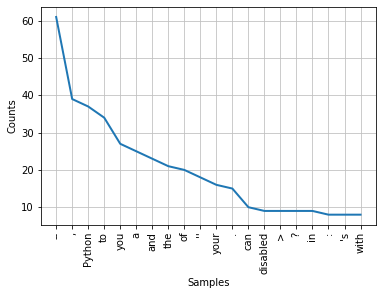

In [22]:
import matplotlib.pyplot as plt
freq.plot(20)
plt.show()

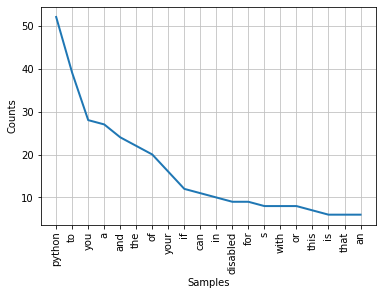

In [28]:
from nltk.tokenize import RegexpTokenizer
text=text.lower()
tokenizer = RegexpTokenizer(r'\w+')
clean_tokens= tokenizer.tokenize(text)
#print(clean_tokens)

# count word frequency

freq = nltk.FreqDist(clean_tokens)
    
import matplotlib.pyplot as plt

freq.plot(20)
plt.show()

In [29]:
# removing stop words

from nltk.corpus import stopwords
 
clean_tokens1 = clean_tokens[:]  # copy of the list
 
#sr = stopwords.words('english')
#print(sr) 
for token in clean_tokens:
 
    if token in stopwords.words('english'):
 
        clean_tokens1.remove(token)

newfreq = nltk.FreqDist(clean_tokens1)
 
for key,val in newfreq.items():
 
    print (str(key) + ':' + str(val))
    


beginnersguide:2
python:52
wikisearch:1
beginnersguidebeginnersguidefrontpagerecentchangesfindpagehelpcontentsbeginnersguidepageimmutable:1
pagecommentsinfoattachmentsmore:1
actions:1
raw:1
textprint:1
viewdelete:1
cacheclass:1
disabled:9
check:2
spellinglike:1
pageslocal:1
site:2
mapclass:1
class:3
rename:1
pageclass:2
delete:1
remove:1
spamclass:1
revert:1
revisionclass:1
slideshowuserloginbeginner:1
guide:4
pythonnew:1
programming:4
free:1
easy:1
learn:4
know:3
start:1
help:5
get:1
started:1
quickly:1
chinese:1
translationnew:1
readbeginnersguide:2
overviewfor:1
short:1
explanation:2
getting:1
pythonnext:2
install:2
3:2
interpreter:3
computer:2
program:5
reads:1
programs:2
carries:1
instructions:3
need:5
mac:1
linux:1
distributions:1
may:2
include:2
outdated:1
version:2
2:1
updated:1
one:2
seebeginnersguide:2
downloadfor:1
download:1
correct:1
also:3
ide:1
bundles:1
available:1
asthonny:1
options:1
found:1
atintegrateddevelopmentenvironments:1
stage:1
want:3
edit:2
save:1
code:2
tak

In [30]:
#nltk.download()

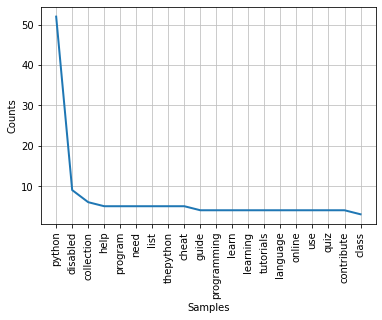

In [31]:
newfreq.plot(20)